In [70]:
#WORKING
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter

pygame.init()

width, height = 1536//2, 814//2
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(1230)

particlenumber=1000

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)
angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))
pos[:,0] =  width//2
pos[:,1] = height//2

run=0
a=0

def upd():
    pos[:,0]=pos[:,0]+np.cos(angle)*vel
    pos[:,1]=pos[:,1]+np.sin(angle)*vel
    while (np.max(pos[:,1])>=height):
        ani = np.argmax(pos[:,1])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,1] = pos[ani,1] + np.sin(angle[ani])*vel
    while (np.min(pos[:,1])<0):
        ani = np.argmin(pos[:,1])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,1] = pos[ani,1] + np.sin(angle[ani])*vel
    while (np.max(pos[:,0])>=width):
        ani = np.argmax(pos[:,0])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,0] = pos[ani,0] + np.cos(angle[ani])*vel
    while (np.min(pos[:,0])<0):
        ani = np.argmin(pos[:,0])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,0] = pos[ani,0] + np.cos(angle[ani])*vel
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
       
        deg15=0.523599
        xtpos=int(pos[i,0]+np.cos(angle[i]-deg15)*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]-deg15)*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorl = screen.get_at((int(pos[i,0]+np.cos(angle[i]-deg15)*vel), int(pos[i,1]+np.sin(angle[i]-deg15)*vel)))
        else:
            pixel_colorl=np.zeros(4)
        
        xtpos=int(pos[i,0]+np.cos(angle[i])*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i])*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorf = screen.get_at((int(pos[i,0]+np.cos(angle[i])*vel), int(pos[i,1]+np.sin(angle[i])*vel)))
        else:
            pixel_colorf=np.zeros(4)
        
        xtpos=int(pos[i,0]+np.cos(angle[i]+deg15)*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]+deg15)*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorr = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg15)*vel), int(pos[i,1]+np.sin(angle[i]+deg15)*vel)))
        else:
            pixel_colorr=np.zeros(4)
            
        xtpos=int(pos[i,0]+np.cos(angle[i]-deg15)*3*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]-deg15)*3*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorll = screen.get_at((int(pos[i,0]+np.cos(angle[i]-deg15)*3*vel), int(pos[i,1]+np.sin(angle[i]-deg15)*3*vel)))
        else:
            pixel_colorll=np.zeros(4)
          
        xtpos=int(pos[i,0]+np.cos(angle[i]+deg15)*vel*3)
        ytpos=int(pos[i,1]+np.sin(angle[i]+deg15)*vel*3)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorrr = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg15)*vel*3), int(pos[i,1]+np.sin(angle[i]+deg15)*vel*3)))
        else:
            pixel_colorrr=np.zeros(4)
        
        l=np.mean((pixel_colorl[:3]))
        f=np.mean(pixel_colorf[:3])
        r=np.mean(pixel_colorr[:3])
        ll=np.mean(pixel_colorll[:3])
        rr=np.mean(pixel_colorrr[:3])
 #       d=np.array([l,f,r])
        d=np.array([l,f,r,ll,rr])
        if(np.max(d)>0):
            a=np.max(d)
            ar=np.argmax(d)
            if (ar==0):
                angle[i]=angle[i]-deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==1):
                angle[i]=angle[i]+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==2):
                angle[i]=angle[i]+deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==3):
                angle[i]=angle[i]-deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==4):
                angle[i]=angle[i]+deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
#            print(np.random.uniform(-0.1, 0.1)*(1-a/255))


while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            run=1
    if(run==1):
        if(vel<2):
            vel=vel+0.02

        border=1

        pixels=(pixels*0.95).astype(int)

        pixels = gaussian_filter(pixels, sigma=0.5)


        pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255

        nupd()


    #     mp = pygame.mouse.get_pos()
    #     pixels[mp[0]-10:mp[0]+10,mp[1]-10:mp[1]+10]=255

        pygame.surfarray.blit_array(screen, pixels)
        pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()

SystemExit: 

In [3]:
np.max(pos)

767.7284657910016

In [133]:
screen.get_at((1,1))

error: display Surface quit

In [39]:
angle

array([6.24222703, 2.17290408, 3.39084505, 0.43534523, 2.48462195,
       4.02720326, 5.00446888, 2.16176261])

In [48]:
pos.astype(int)

array([[400, 300],
       [400, 300],
       [400, 300],
       [400, 300],
       [400, 300],
       [400, 300],
       [400, 300],
       [400, 300]])

In [62]:
np.random.seed(12)
a=np.random.uniform(0,1, size=1)
np.random.uniform(0,1, size=1)

array([0.7400497])

In [96]:
import pygame

# Initialize Pygame
pygame.init()

# Get the display info
info = pygame.display.Info()

# Get the full window size
window_width = info.current_w
window_height = info.current_h

# Print the window size
print("Full Window Size: {} x {}".format(window_width, window_height))


Full Window Size: 1536 x 864


In [1]:
import numpy as np
import pygame
import sys

pygame.init()

width, height = 1536, 814
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Pixel Manipulation with NumPy")

clock = pygame.time.Clock()
running = True

# Create a NumPy array to represent the screen
np.random.seed(123)

pixels = np.zeros((width, height, 3), dtype=np.uint8)
angle = np.random.uniform(0, 2*np.pi, size=(4000))
pos = np.ones((4000, 2))
pos[:,0] = width // 2
pos[:,1] = height // 2

a = 0

def upd():
    # Update particle positions within the upd() function
    pos[:,0] = pos[:,0] + np.cos(angle) * 3
    pos[:,1] = pos[:,1] + np.sin(angle) * 3

    # Check boundaries and update particles
    for i in range(len(pos)):
        if pos[i,0] >= width or pos[i,0] <= 0 or pos[i,1] >= height or pos[i,1] <= 0:
            angle[i] = np.random.uniform(0, 2*np.pi)
            pos[i,0] = width // 2
            pos[i,1] = height // 2

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Update particle positions first
    upd()

    # Manipulate pixels using NumPy
    pixels[pos[:,0].astype(int), pos[:,1].astype(int)] = 255
    
    # Clear the screen
    screen.fill((0, 0, 0))

    # Update the display
    pygame.surfarray.blit_array(screen, pixels)
    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\pranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [195]:
#useless

import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter
import cv2

pygame.init()

width, height = 1536//3, 814//3
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber=1000

vel=2

pixels = np.zeros((width, height, 3), dtype=np.uint8)
angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))
pos[:,0] =  width//2
pos[:,1] = height//2

a=0

def upd():
    pos[:,0]=pos[:,0]+np.cos(angle)*vel
    pos[:,1]=pos[:,1]+np.sin(angle)*vel
    while (np.max(pos[:,1])>=height):
        ani = np.argmax(pos[:,1])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,1] = pos[ani,1] + np.sin(angle[ani])*vel
    while (np.min(pos[:,1])<0):
        ani = np.argmin(pos[:,1])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,1] = pos[ani,1] + np.sin(angle[ani])*vel
    while (np.max(pos[:,0])>=width):
        ani = np.argmax(pos[:,0])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,0] = pos[ani,0] + np.cos(angle[ani])*vel
    while (np.min(pos[:,0])<0):
        ani = np.argmin(pos[:,0])
        pos[ani,0] = pos[ani,0] - np.cos(angle[ani])*vel
        pos[ani,1] = pos[ani,1] - np.sin(angle[ani])*vel
        angle[ani] = np.random.uniform(0, 2*np.pi)
        #pos[ani,0] = pos[ani,0] + np.cos(angle[ani])*vel
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
       
        deg15=0.523599
        xtpos=int(pos[i,0]+np.cos(angle[i]-deg15)*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]-deg15)*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorl = screen.get_at((int(pos[i,0]+np.cos(angle[i]-deg15)*vel), int(pos[i,1]+np.sin(angle[i]-deg15)*vel)))
        else:
            pixel_colorl=np.zeros(4)
        
        xtpos=int(pos[i,0]+np.cos(angle[i])*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i])*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorf = screen.get_at((int(pos[i,0]+np.cos(angle[i])*vel), int(pos[i,1]+np.sin(angle[i])*vel)))
        else:
            pixel_colorf=np.zeros(4)
        
        xtpos=int(pos[i,0]+np.cos(angle[i]+deg15)*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]+deg15)*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorr = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg15)*vel), int(pos[i,1]+np.sin(angle[i]+deg15)*vel)))
        else:
            pixel_colorr=np.zeros(4)
            
        xtpos=int(pos[i,0]+np.cos(angle[i]-deg15)*3*vel)
        ytpos=int(pos[i,1]+np.sin(angle[i]-deg15)*3*vel)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorll = screen.get_at((int(pos[i,0]+np.cos(angle[i]-deg15)*3*vel), int(pos[i,1]+np.sin(angle[i]-deg15)*3*vel)))
        else:
            pixel_colorll=np.zeros(4)
          
        xtpos=int(pos[i,0]+np.cos(angle[i]+deg15)*vel*3)
        ytpos=int(pos[i,1]+np.sin(angle[i]+deg15)*vel*3)
        if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
            pixel_colorrr = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg15)*vel*3), int(pos[i,1]+np.sin(angle[i]+deg15)*vel*3)))
        else:
            pixel_colorrr=np.zeros(4)
        
        l=np.mean((pixel_colorl[:3]))
        f=np.mean(pixel_colorf[:3])
        r=np.mean(pixel_colorr[:3])
        ll=np.mean(pixel_colorll[:3])
        rr=np.mean(pixel_colorrr[:3])
 #       d=np.array([l,f,r])
        d=np.array([l,f,r,ll,rr])
        if(np.max(d)>0):
            a=np.max(d)
            ar=np.argmax(d)
            if (ar==0):
                angle[i]=angle[i]-deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==1):
                angle[i]=angle[i]+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==2):
                angle[i]=angle[i]+deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==3):
                angle[i]=angle[i]-deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
            elif (ar==4):
                angle[i]=angle[i]+deg15+deg15*np.random.uniform(-0.1, 0.1)*(1-a/255)
#            print(np.random.uniform(-0.1, 0.1)*(1-a/255))
            


while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    
    border=0.95
    
    pixels=(pixels*0.95).astype(int)
    
    
    
    pixels = gaussian_filter(pixels, sigma=1)
    
    mp = pygame.mouse.get_pos()
    pixels[mp[0],:,0]=255


#     pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255
    
#     nupd()
    
    
#     
#     pixels[mp[0]-10:mp[0]+10,mp[1]-10:mp[1]+10]=255
    
    pygame.surfarray.blit_array(screen, pixels)
    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()

SystemExit: 

In [1]:
#WORKING improved sense
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter
import cv2

pygame.init()

width, height = 1536//2, 814//2
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber=2000

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)
posfollow =  np.ones((particlenumber,2))
angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))
# pos[:,0] =  width//2
# pos[:,1] = height//2

a=0
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
        
        
        cc=0
        maxx=0
        maxang=0
        
        res=3
        pixel_col=np.zeros((res,4))
        reach=np.pi/2
        
        
        for degr in range(res):
            deg=(reach/(res-1)*degr)-reach/2
#             print(degr)
#             print(deg/2/np.pi*360)
            xtpos=int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3))
            ytpos=int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))
            if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
                pixel_col[cc] = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3)), int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))))
            else:
                pixel_col[cc] = np.zeros(4)
            
            l=np.mean(pixel_col[cc,:3])
            if (l>maxx):
                maxx=l
                maxang=deg
            
            cc+=1
        #l=np.mean((pixel_col[:,:3]),axis=1)
        
        if (maxx>0):
            angle[i]=angle[i]+maxang+deg*np.random.uniform(-0.1, 0.1)*(1-maxx/255)


            


while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            print(1)
            mp = pygame.mouse.get_pos()
            

    # Changing border to 0.95 or smaller values tends to give weird behaviour such as following parallel tracks
    # and a net centerward motion idfky
    border=1
    thres=20
    
    pixels=(pixels*0.99).astype(int)
    pixels=(pixels>thres)*pixels
        
    
    pixels = gaussian_filter(pixels, sigma=0.5)
    

    pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255
    
    nupd()
    
    
#     mp = pygame.mouse.get_pos()
#     pixels[mp[0]-10:mp[0]+10,mp[1]-10:mp[1]+10]=255
    
    pygame.surfarray.blit_array(screen, pixels)
    pygame.display.flip()
    clock.tick(120)

pygame.quit()
sys.exit()



pygame 2.5.2 (SDL 2.28.3, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\pranj\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3450: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [268]:
colour=np.ones((particlenumber,3))*255

In [269]:
colour

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       ...,
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.]])

In [266]:
colour[1]=([2,3,4])

In [17]:
ww=np.array([-0.7853981633974483,-0.261799387799149,0.2617993877991494])

In [18]:
ww/2/np.pi*360

array([-45., -15.,  15.])

In [23]:
ww1=np.array([-3.141592653589793,-1.0471975511965976,1.0471975511965976])
ww1/2/np.pi*360

array([-180.,  -60.,   60.])

In [46]:
pixels

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

In [2]:
#WORKING improved sense follow check
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter
import cv2

pygame.init()

width, height = 1536//4, 814//4
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber=2000

anglerandomnessfactor=5

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)
pixelsfollow = np.zeros((width, height, 3), dtype=np.uint8)
posfollow =  np.ones((particlenumber,2))
isfollowing = np.zeros(particlenumber)
angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos1 = np.ones((particlenumber,2))
# pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
# pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))

# pos[:,0] =  width//2
# pos[:,1] = height//2

def is_inside_circle(x, y, circle_radius):
    return (x - width / 2) ** 2 + (y - height / 2) ** 2 <= circle_radius ** 2

# Define the radius of the circle
circle_radius = min(width, height) / 2.5

# Generate random polar coordinates within the circle
r = np.random.uniform(0, circle_radius, size=(particlenumber))
theta = np.random.uniform(0, 2 * np.pi, size=(particlenumber))

# Convert polar coordinates to Cartesian coordinates
pos[:, 0] = width / 2 + r * np.cos(theta)
pos[:, 1] = height / 2 + r * np.sin(theta)

for i in range(particlenumber):
    pos1[i, 0] = pos[i, 0] + np.cos(angle[i]) * vel*10
    pos1[i, 1] = pos[i, 1] + np.sin(angle[i]) * vel*10

    # Check if the particle has escaped the circle
    if not is_inside_circle(pos1[i, 0], pos1[i, 1], circle_radius):
        # Reset position inside the circle
        r = np.random.uniform(0, circle_radius)
        theta = np.random.uniform(0, 2 * np.pi)
        pos[i, 0] = width / 2 + r * np.cos(theta)
        pos[i, 1] = height / 2 + r * np.sin(theta)

        # Update angle towards the center
        angle[i] = np.arctan2(height / 2 - pos[i, 1], width / 2 - pos[i, 0])

pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))




a=0
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
        
        
        cc=0
        maxx=0
        maxang=0
        
        res=3
        pixel_col=np.zeros((res,4))
        reach=np.pi/2
        
        
        for degr in range(res):
            deg=(reach/(res-1)*degr)-reach/2
#             print(degr)
#             print(deg/2/np.pi*360)
            xtpos=int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3))
            ytpos=int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))
            if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
                pixel_col[cc] = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3)), int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))))
            else:
                pixel_col[cc] = np.zeros(4)
            
            l=np.mean(pixel_col[cc,:3])
            if (l>maxx):
                maxx=l
                maxang=deg
            
            cc+=1
        #l=np.mean((pixel_col[:,:3]),axis=1)
        
        if (maxx>0):
            #angle[i]=angle[i]+maxang+deg*np.random.uniform(-anglerandomnessfactor/180*np.pi, anglerandomnessfactor/180*np.pi)*(1-maxx/255)
            angle[i]=angle[i]+maxang+np.random.normal(0, anglerandomnessfactor/180*np.pi)
            isfollowing[i]=1
        else:
            isfollowing[i]=0


            
rrr=1
st=0
framno=600
fram=0
frame_ar=np.zeros((framno, width, height, 3), dtype=np.uint8)


while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            st=1
        elif event.type == pygame.MOUSEBUTTONDOWN:
            rrr=1-rrr
            if(rrr==0):
                mp = pygame.mouse.get_pos()
                moddist=np.sqrt((mp[0]-pos[:,0])**2+(mp[1]-pos[:,1])**2)
                closest=np.argmin(moddist)
                pixelsfollow=pixels
                xx1=int((1-border)/2*width)+(pos[closest,0]*border).astype(int)
                yy1=int((1-border)/2*height)+(pos[closest,1]*border).astype(int)
                pixelsfollow[xx1-1:xx1+1,yy1-1:yy1+1] = (255,255,0)

                num_points = int(np.min(moddist))
                linex = np.linspace(pos[closest, 0], mp[0], num_points)
                liney = np.linspace(pos[closest, 1], mp[1], num_points)

                pixelsfollow[linex.astype(int), liney.astype(int)] = (255, 255, 0)
                
                print(f"Particle Info: P.No.: {closest}   Following: {isfollowing[closest]==1}   Coords: {pos[closest]}")
                
            if(rrr==1):
                pixelsfollow[linex.astype(int), liney.astype(int)] = (0, 0, 0)

    
    
    border=1
    thres=20
    
    if(rrr==1 and st==1):
    
        pixels=(pixels*0.99).astype(int)
        pixels=(pixels>thres)*pixels


        pixels = gaussian_filter(pixels, sigma=0.5)


        pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255


        nupd()
    
        pygame.surfarray.blit_array(screen, pixels)
        

#     mp = pygame.mouse.get_pos()
#     pixels[mp[0]-10:mp[0]+10,mp[1]-10:mp[1]+10]=255
    
    if(rrr==0):
        pygame.surfarray.blit_array(screen, pixelsfollow)

    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()


SystemExit: 

In [110]:
(pos-10)

array([[ 2.60233011e+02, -2.30356122e-02],
       [-9.49700765e+00, -5.63987893e+00],
       [ 1.13293584e+02,  5.61466385e+01],
       ...,
       [ 1.97041431e+01,  7.86861106e+01],
       [-9.64924689e+00,  4.72045094e+01],
       [ 6.39607998e+01,  1.67035468e+02]])

In [83]:
pos[:,0]

array([324.48445731, 282.95022018,  20.67475478, ..., 551.57955659,
       527.71667441, 492.52269606])

In [122]:
#Working slightly optimized by gpt
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter

pygame.init()

width, height = 1536 // 4, 814 // 4
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber = 10000
anglerandomnessfactor = 5
vel = 1

pixels = np.zeros((width, height, 3), dtype=np.uint8)
pixelsfollow = np.zeros((width, height, 3), dtype=np.uint8)
posfollow = np.ones((particlenumber, 2))
isfollowing = np.zeros(particlenumber)
angle = np.random.uniform(0, 2 * np.pi, size=(particlenumber))
pos = np.ones((particlenumber, 2))
pos[:, 0] = np.random.uniform(1, width - 1, size=(particlenumber))
pos[:, 1] = np.random.uniform(1, height - 1, size=(particlenumber))

a = 0


def nupd(pos, angle, vel, width, height):
    for i in range(particlenumber):
        pos[i, 0] += np.cos(angle[i]) * vel
        pos[i, 1] += np.sin(angle[i]) * vel

        if not (0 <= pos[i, 1] < height and 0 <= pos[i, 0] < width):
            pos[i, 0] -= np.cos(angle[i]) * vel
            pos[i, 1] -= np.sin(angle[i]) * vel
            angle[i] = np.random.uniform(0, 2 * np.pi)

        cc = 0
        maxx = 0
        maxang = 0
        res = 3
        pixel_col = np.zeros((res, 4))
        reach = np.pi / 2

        for degr in range(res):
            deg = (reach / (res - 1) * degr) - reach / 2
            xtpos = int(pos[i, 0] + np.cos(angle[i] + deg) * (vel * 3))
            ytpos = int(pos[i, 1] + np.sin(angle[i] + deg) * (vel * 3))
            if (0 <= ytpos < height and 0 <= xtpos < width):
                pixel_col[cc] = screen.get_at((xtpos, ytpos))
            else:
                pixel_col[cc] = np.zeros(4)

            l = np.mean(pixel_col[cc, :3])
            if l > maxx:
                maxx = l
                maxang = deg

            cc += 1

        if maxx > 0:
            angle[i] = angle[i] + maxang + np.random.normal(0, anglerandomnessfactor / 180 * np.pi)
            isfollowing[i] = 1
        else:
            isfollowing[i] = 0

    return pos, angle, isfollowing


rrr = 1
st = 0

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            st = 1
        elif event.type == pygame.MOUSEBUTTONDOWN:
            rrr = 1 - rrr
            if rrr == 0:
                mp = pygame.mouse.get_pos()
                moddist = np.sqrt((mp[0] - pos[:, 0]) ** 2 + (mp[1] - pos[:, 1]) ** 2)
                closest = np.argmin(moddist)
                pixelsfollow = pixels
                xx1 = int((1 - border) / 2 * width) + (pos[closest, 0] * border).astype(int)
                yy1 = int((1 - border) / 2 * height) + (pos[closest, 1] * border).astype(int)
                pixelsfollow[xx1 - 1:xx1 + 1, yy1 - 1:yy1 + 1] = (255, 255, 0)

                num_points = int(np.min(moddist))
                linex = np.linspace(pos[closest, 0], mp[0], num_points)
                liney = np.linspace(pos[closest, 1], mp[1], num_points)

                pixelsfollow[linex.astype(int), liney.astype(int)] = (255, 255, 0)

                print(
                    f"Particle Info: P.No.: {closest}   Following: {isfollowing[closest] == 1}   Coords: {pos[closest]}")

            if rrr == 1:
                pixelsfollow[linex.astype(int), liney.astype(int)] = (0, 0, 0)

    border = 1
    thres = 20

    if rrr == 1 and st == 1:
        pixels = (pixels * 0.99).astype(int)
        pixels = (pixels > thres) * pixels

        pixels = gaussian_filter(pixels, sigma=0.5)

        pixels[int((1 - border) / 2 * width) + (pos[:, 0] * border).astype(int),
               int((1 - border) / 2 * height) + (pos[:, 1] * border).astype(int)] = 255

        pos, angle, isfollowing = nupd(pos, angle, vel, width, height)

        pygame.surfarray.blit_array(screen, pixels)

    if rrr == 0:
        pygame.surfarray.blit_array(screen, pixelsfollow)

    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()


SystemExit: 

In [ ]:
#WORKING improved sense follow check (for custom numpy only pre)
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter
import cv2

pygame.init()

width, height = 1536//4, 814//4
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber=1000

anglerandomnessfactor=5

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)

angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos1 = np.ones((particlenumber,2))
# pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
# pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))

# pos[:,0] =  width//2
# pos[:,1] = height//2

pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))




a=0
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
        
        
        cc=0
        maxx=0
        maxang=0
        
        res=3
        pixel_col=np.zeros((res,4))
        reach=np.pi/2
        
        
        for degr in range(res):
            deg=(reach/(res-1)*degr)-reach/2
#             print(degr)
#             print(deg/2/np.pi*360)
            xtpos=int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3))
            ytpos=int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))
            if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
                pixel_col[cc] = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3)), int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))))
            else:
                pixel_col[cc] = np.zeros(4)
            
            l=np.mean(pixel_col[cc,:3])
            if (l>maxx):
                maxx=l
                maxang=deg
            
            cc+=1
        #l=np.mean((pixel_col[:,:3]),axis=1)
        
        if (maxx>0):
            #angle[i]=angle[i]+maxang+deg*np.random.uniform(-anglerandomnessfactor/180*np.pi, anglerandomnessfactor/180*np.pi)*(1-maxx/255)
            angle[i]=angle[i]+maxang+np.random.normal(0, anglerandomnessfactor/180*np.pi)



            
rrr=1
st=0

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False


    
    border=1
    thres=20
    

    
    pixels=(pixels*0.99).astype(int)
    pixels=(pixels>thres)*pixels


    pixels = gaussian_filter(pixels, sigma=0.5)


    pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255


    nupd()

    pygame.surfarray.blit_array(screen, pixels)

    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()

In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter

width, height = 1536 // 4, 814 // 4

np.random.seed(123)

particlenumber = 1000
anglerandomnessfactor = 5
vel = 1

pixels_array = np.zeros((600, width, height), dtype=np.uint8)

angle = np.random.uniform(0, 2 * np.pi, size=(particlenumber))
pos = np.ones((particlenumber, 2))

pos[:, 0] = np.random.uniform(1, width - 1, size=(particlenumber))
pos[:, 1] = np.random.uniform(1, height - 1, size=(particlenumber))

a = 0


def nupd():
    for i in range(particlenumber):
        pos[i, 0] = pos[i, 0] + np.cos(angle[i]) * vel
        pos[i, 1] = pos[i, 1] + np.sin(angle[i]) * vel
        if (pos[i, 1] >= height or pos[i, 1] < 0 or pos[i, 0] >= width or pos[i, 0] < 0):
            pos[i, 0] = pos[i, 0] - np.cos(angle[i]) * vel
            pos[i, 1] = pos[i, 1] - np.sin(angle[i]) * vel
            angle[i] = np.random.uniform(0, 2 * np.pi)

        cc = 0
        maxx = 0
        maxang = 0

        res = 3
        pixel_col = np.zeros((res, 4))
        reach = np.pi / 2

        for degr in range(res):
            deg = (reach / (res - 1) * degr) - reach / 2
            xtpos = int(pos[i, 0] + np.cos(angle[i] + deg) * (vel * 3))
            ytpos = int(pos[i, 1] + np.sin(angle[i] + deg) * (vel * 3))
            if (ytpos < height and ytpos >= 0 and xtpos < width and xtpos >= 0):
                pixel_col[cc] = pixels_array[a - 1, xtpos, ytpos]
            else:
                pixel_col[cc] = np.zeros(4)

            l = np.mean(pixel_col[cc, :3])
            if (l > maxx):
                maxx = l
                maxang = deg

            cc += 1

        if (maxx > 0):
            angle[i] = angle[i] + maxang + np.random.normal(0, anglerandomnessfactor / 180 * np.pi)



for a in range(600):
    border = 1
    thres = 20

    pixels_array[a] = (pixels_array[a] * 0.99).astype(int)
    pixels_array[a] = (pixels_array[a] > thres) * pixels_array[a]

    pixels_array[a] = gaussian_filter(pixels_array[a], sigma=0.5)

    pixels_array[a, int((1 - border) / 2 * width) + (pos[:, 0] * border).astype(int),
                int((1 - border) / 2 * height) + (pos[:, 1] * border).astype(int)] = 255

    nupd()
    if (a%60==0):
        print (a/6)

# Now you have pixel values stored in the `pixels_array` for each frame (600 frames).
# You can access them like pixels_array[frame_number, x, y].



0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0


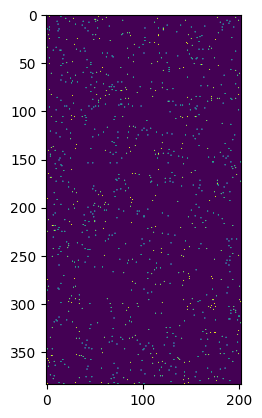

In [48]:
import matplotlib.pyplot as plt
plt.imshow(pixels_array[599])

In [38]:
(pixels_array[3]).shape()

TypeError: 'tuple' object is not callable

In [26]:
np.sum(pixels_array[20],axis=2).max()

0

In [41]:

#WORKING improved sense follow check numpy
import numpy as np
import pygame
import sys
from scipy.ndimage import gaussian_filter
import cv2

pygame.init()

width, height = 1536, 814
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Slime")

clock = pygame.time.Clock()
running = True

np.random.seed(123)

particlenumber=100000

anglerandomnessfactor=5

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)
pixelsfollow = np.zeros((width, height, 3), dtype=np.uint8)
posfollow =  np.ones((particlenumber,2))
isfollowing = np.zeros(particlenumber)
angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))
pos1 = np.ones((particlenumber,2))
# pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
# pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))

# pos[:,0] =  width//2
# pos[:,1] = height//2

def is_inside_circle(x, y, circle_radius):
    return (x - width / 2) ** 2 + (y - height / 2) ** 2 <= circle_radius ** 2

# Define the radius of the circle
circle_radius = min(width, height) / 2.5

# Generate random polar coordinates within the circle
r = np.random.uniform(0, circle_radius, size=(particlenumber))
theta = np.random.uniform(0, 2 * np.pi, size=(particlenumber))

# Convert polar coordinates to Cartesian coordinates
pos[:, 0] = width / 2 + r * np.cos(theta)
pos[:, 1] = height / 2 + r * np.sin(theta)

for i in range(particlenumber):
    pos1[i, 0] = pos[i, 0] + np.cos(angle[i]) * vel*10
    pos1[i, 1] = pos[i, 1] + np.sin(angle[i]) * vel*10

    # Check if the particle has escaped the circle
    if not is_inside_circle(pos1[i, 0], pos1[i, 1], circle_radius):
        # Reset position inside the circle
        r = np.random.uniform(0, circle_radius)
        theta = np.random.uniform(0, 2 * np.pi)
        pos[i, 0] = width / 2 + r * np.cos(theta)
        pos[i, 1] = height / 2 + r * np.sin(theta)

        # Update angle towards the center
        angle[i] = np.arctan2(height / 2 - pos[i, 1], width / 2 - pos[i, 0])

pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))




a=0
        
def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
        
        
        cc=0
        maxx=0
        maxang=0
        
        res=3
        pixel_col=np.zeros((res,4))
        reach=np.pi/2
        
        
        for degr in range(res):
            deg=(reach/(res-1)*degr)-reach/2
#             print(degr)
#             print(deg/2/np.pi*360)
            xtpos=int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3))
            ytpos=int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))
            if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
                pixel_col[cc] = screen.get_at((int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3)), int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))))
            else:
                pixel_col[cc] = np.zeros(4)
            
            l=np.mean(pixel_col[cc,:3])
            if (l>maxx):
                maxx=l
                maxang=deg
            
            cc+=1
        #l=np.mean((pixel_col[:,:3]),axis=1)
        
        if (maxx>0):
            #angle[i]=angle[i]+maxang+deg*np.random.uniform(-anglerandomnessfactor/180*np.pi, anglerandomnessfactor/180*np.pi)*(1-maxx/255)
            angle[i]=angle[i]+maxang+np.random.normal(0, anglerandomnessfactor/180*np.pi)
            isfollowing[i]=1
        else:
            isfollowing[i]=0


            
rrr=1
st=0
tsec=60
framno=60*tsec
fram=0
frame_ar=np.zeros((framno, width, height, 3), dtype=np.uint8)


while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
            st=1
        elif event.type == pygame.MOUSEBUTTONDOWN:
            rrr=1-rrr
            if(rrr==0):
                mp = pygame.mouse.get_pos()
                moddist=np.sqrt((mp[0]-pos[:,0])**2+(mp[1]-pos[:,1])**2)
                closest=np.argmin(moddist)
                pixelsfollow=pixels
                xx1=int((1-border)/2*width)+(pos[closest,0]*border).astype(int)
                yy1=int((1-border)/2*height)+(pos[closest,1]*border).astype(int)
                pixelsfollow[xx1-1:xx1+1,yy1-1:yy1+1] = (255,255,0)

                num_points = int(np.min(moddist))
                linex = np.linspace(pos[closest, 0], mp[0], num_points)
                liney = np.linspace(pos[closest, 1], mp[1], num_points)

                pixelsfollow[linex.astype(int), liney.astype(int)] = (255, 255, 0)
                
                print(f"Particle Info: P.No.: {closest}   Following: {isfollowing[closest]==1}   Coords: {pos[closest]}")
                
            if(rrr==1):
                pixelsfollow[linex.astype(int), liney.astype(int)] = (0, 0, 0)

    
    
    border=1
    thres=20
    
    if(rrr==1 and st==1):
    
        pixels=(pixels*0.99).astype(int)
        pixels=(pixels>thres)*pixels


        pixels = gaussian_filter(pixels, sigma=0.5)


        pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255


        nupd()
    
        pygame.surfarray.blit_array(screen, pixels)
        
        frame_ar[fram]=pixels
        fram+=1
        
        print(f"{np.round(fram/framno*100,2)} % render complete")
        
        if (fram>=framno):
            pygame.quit()
            sys.exit()

#     mp = pygame.mouse.get_pos()
#     pixels[mp[0]-10:mp[0]+10,mp[1]-10:mp[1]+10]=255
    
    if(rrr==0):
        pygame.surfarray.blit_array(screen, pixelsfollow)

    pygame.display.flip()
    clock.tick(60)

pygame.quit()
sys.exit()

Particle Info: P.No.: 87335   Following: False   Coords: [807.94558445 414.13315243]
0.03 % render complete
0.06 % render complete
0.08 % render complete
0.11 % render complete
0.14 % render complete
0.17 % render complete
0.19 % render complete
0.22 % render complete
0.25 % render complete
0.28 % render complete
0.31 % render complete
0.33 % render complete
0.36 % render complete
0.39 % render complete
0.42 % render complete
0.44 % render complete
0.47 % render complete
0.5 % render complete
0.53 % render complete
0.56 % render complete
0.58 % render complete
0.61 % render complete
0.64 % render complete
0.67 % render complete
0.69 % render complete
0.72 % render complete
0.75 % render complete
0.78 % render complete
0.81 % render complete
0.83 % render complete
0.86 % render complete
0.89 % render complete
0.92 % render complete
0.94 % render complete
0.97 % render complete
1.0 % render complete
1.03 % render complete
1.06 % render complete
1.08 % render complete
1.11 % render comple

9.86 % render complete
9.89 % render complete
9.92 % render complete
9.94 % render complete
9.97 % render complete
10.0 % render complete
10.03 % render complete
10.06 % render complete
10.08 % render complete
10.11 % render complete
10.14 % render complete
10.17 % render complete
10.19 % render complete
10.22 % render complete
10.25 % render complete
10.28 % render complete
10.31 % render complete
10.33 % render complete
10.36 % render complete
10.39 % render complete
10.42 % render complete
10.44 % render complete
10.47 % render complete
10.5 % render complete
10.53 % render complete
10.56 % render complete
10.58 % render complete
10.61 % render complete
10.64 % render complete
10.67 % render complete
10.69 % render complete
10.72 % render complete
10.75 % render complete
10.78 % render complete
10.81 % render complete
10.83 % render complete
10.86 % render complete
10.89 % render complete
10.92 % render complete
10.94 % render complete
10.97 % render complete
11.0 % render complete


19.39 % render complete
19.42 % render complete
19.44 % render complete
19.47 % render complete
19.5 % render complete
19.53 % render complete
19.56 % render complete
19.58 % render complete
19.61 % render complete
19.64 % render complete
19.67 % render complete
19.69 % render complete
19.72 % render complete
19.75 % render complete
19.78 % render complete
19.81 % render complete
19.83 % render complete
19.86 % render complete
19.89 % render complete
19.92 % render complete
19.94 % render complete
19.97 % render complete
20.0 % render complete
20.03 % render complete
20.06 % render complete
20.08 % render complete
20.11 % render complete
20.14 % render complete
20.17 % render complete
20.19 % render complete
20.22 % render complete
20.25 % render complete
20.28 % render complete
20.31 % render complete
20.33 % render complete
20.36 % render complete
20.39 % render complete
20.42 % render complete
20.44 % render complete
20.47 % render complete
20.5 % render complete
20.53 % render comp

28.92 % render complete
28.94 % render complete
28.97 % render complete
29.0 % render complete
29.03 % render complete
29.06 % render complete
29.08 % render complete
29.11 % render complete
29.14 % render complete
29.17 % render complete
29.19 % render complete
29.22 % render complete
29.25 % render complete
29.28 % render complete
29.31 % render complete
29.33 % render complete
29.36 % render complete
29.39 % render complete
29.42 % render complete
29.44 % render complete
29.47 % render complete
29.5 % render complete
29.53 % render complete
29.56 % render complete
29.58 % render complete
29.61 % render complete
29.64 % render complete
29.67 % render complete
29.69 % render complete
29.72 % render complete
29.75 % render complete
29.78 % render complete
29.81 % render complete
29.83 % render complete
29.86 % render complete
29.89 % render complete
29.92 % render complete
29.94 % render complete
29.97 % render complete
30.0 % render complete
30.03 % render complete
30.06 % render comp

38.44 % render complete
38.47 % render complete
38.5 % render complete
38.53 % render complete
38.56 % render complete
38.58 % render complete
38.61 % render complete
38.64 % render complete
38.67 % render complete
38.69 % render complete
38.72 % render complete
38.75 % render complete
38.78 % render complete
38.81 % render complete
38.83 % render complete
38.86 % render complete
38.89 % render complete
38.92 % render complete
38.94 % render complete
38.97 % render complete
39.0 % render complete
39.03 % render complete
39.06 % render complete
39.08 % render complete
39.11 % render complete
39.14 % render complete
39.17 % render complete
39.19 % render complete
39.22 % render complete
39.25 % render complete
39.28 % render complete
39.31 % render complete
39.33 % render complete
39.36 % render complete
39.39 % render complete
39.42 % render complete
39.44 % render complete
39.47 % render complete
39.5 % render complete
39.53 % render complete
39.56 % render complete
39.58 % render comp

47.97 % render complete
48.0 % render complete
48.03 % render complete
48.06 % render complete
48.08 % render complete
48.11 % render complete
48.14 % render complete
48.17 % render complete
48.19 % render complete
48.22 % render complete
48.25 % render complete
48.28 % render complete
48.31 % render complete
48.33 % render complete
48.36 % render complete
48.39 % render complete
48.42 % render complete
48.44 % render complete
48.47 % render complete
48.5 % render complete
48.53 % render complete
48.56 % render complete
48.58 % render complete
48.61 % render complete
48.64 % render complete
48.67 % render complete
48.69 % render complete
48.72 % render complete
48.75 % render complete
48.78 % render complete
48.81 % render complete
48.83 % render complete
48.86 % render complete
48.89 % render complete
48.92 % render complete
48.94 % render complete
48.97 % render complete
49.0 % render complete
49.03 % render complete
49.06 % render complete
49.08 % render complete
49.11 % render comp

57.5 % render complete
57.53 % render complete
57.56 % render complete
57.58 % render complete
57.61 % render complete
57.64 % render complete
57.67 % render complete
57.69 % render complete
57.72 % render complete
57.75 % render complete
57.78 % render complete
57.81 % render complete
57.83 % render complete
57.86 % render complete
57.89 % render complete
57.92 % render complete
57.94 % render complete
57.97 % render complete
58.0 % render complete
58.03 % render complete
58.06 % render complete
58.08 % render complete
58.11 % render complete
58.14 % render complete
58.17 % render complete
58.19 % render complete
58.22 % render complete
58.25 % render complete
58.28 % render complete
58.31 % render complete
58.33 % render complete
58.36 % render complete
58.39 % render complete
58.42 % render complete
58.44 % render complete
58.47 % render complete
58.5 % render complete
58.53 % render complete
58.56 % render complete
58.58 % render complete
58.61 % render complete
58.64 % render comp

SystemExit: 

In [54]:
import pygame
import numpy as np

# Set up Pygame
pygame.init()

# Define screen size and other parameters
width, height = 1536 , 814 
frameno = 2000
fps = 1

# Create Pygame screen
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Video Display")

clock = pygame.time.Clock()

# Create the frames array (replace this with your actual pixel values)
frame_arr = frame_ar

running = True
current_frame = 0

rr=0

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            rr=1-rr

            
    if(rr==1):
        # Display the current frame
        current_frame_array = frame_arr[current_frame]
        pygame.surfarray.blit_array(screen, current_frame_array)
        pygame.display.flip()

        # Wait for the next frame
        pygame.time.delay(int(1000 / fps))  # Delay to achieve the desired frame rate

        current_frame += 1
        if current_frame == frameno:
            pygame.quit()
    fps=fps+1
    clock.tick(fps)

pygame.quit()


error: video system not initialized

In [47]:
np.save('framearray',frame_ar[:2282])


In [ ]:
fram

In [28]:
%%time
#Self numpy only final
import numpy as np
from scipy.ndimage import gaussian_filter

width, height = 1536//4, 814//4


np.random.seed(123)

particlenumber=10000

anglerandomnessfactor=5

vel=1

pixels = np.zeros((width, height, 3), dtype=np.uint8)

angle = np.random.uniform(0, 2*np.pi, size=(particlenumber))
pos = np.ones((particlenumber,2))

pos[:,0] =  np.random.uniform(1, width-1, size=(particlenumber))
pos[:,1] = np.random.uniform(1, height-1, size=(particlenumber))

a=0

def nupd():
    for i in range(particlenumber):
        pos[i,0]=pos[i,0]+np.cos(angle[i])*vel
        pos[i,1]=pos[i,1]+np.sin(angle[i])*vel
        if (pos[i,1]>=height or pos[i,1]<0 or pos[i,0]>=width or pos[i,0]<0):
            pos[i,0]=pos[i,0]-np.cos(angle[i])*vel
            pos[i,1]=pos[i,1]-np.sin(angle[i])*vel
            angle[i] = np.random.uniform(0, 2*np.pi)
        
        
        cc=0
        maxx=0
        maxang=0
        
        res=3
        pixel_col=np.zeros((res,3))
        reach=np.pi/2
        
        
        for degr in range(res):
            deg=(reach/(res-1)*degr)-reach/2
            xtpos=int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3))
            ytpos=int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3))
            if (ytpos<height and ytpos>=0 and xtpos<width and xtpos>=0):
                pixel_col[cc] = pixels[(int(pos[i,0]+np.cos(angle[i]+deg)*(vel*3)), int(pos[i,1]+np.sin(angle[i]+deg)*(vel*3)))]
            else:
                pixel_col[cc] = np.zeros(3)
            
            l=np.mean(pixel_col[cc,:3])
            if (l>maxx):
                maxx=l
                maxang=deg
            
            cc+=1
        
        if (maxx>0):
            angle[i]=angle[i]+maxang+np.random.normal(0, anglerandomnessfactor/180*np.pi)


framno=60
#fram=0
frame_ar=np.zeros((framno, width, height, 3), dtype=np.uint8)

for fram in range(framno):
    border=1
    thres=20
    
    pixels=(pixels*0.99).astype(int)
    pixels=(pixels>thres)*pixels


    pixels = gaussian_filter(pixels, sigma=0.5)


    pixels[int((1-border)/2*width)+(pos[:,0]*border).astype(int),int((1-border)/2*height)+(pos[:,1]*border).astype(int)] = 255


    nupd()


    frame_ar[fram]=pixels

    if (fram%(framno//10)==0):
        print(fram/framno)

0.0
0.1
0.2
0.3


KeyboardInterrupt: 

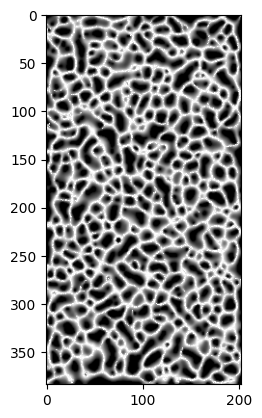

In [25]:
plt.imshow(frame_ar[59])

In [19]:
import matplotlib.pyplot as plt